In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import special as s
from scipy import signal as sig

(-1000.0, 4000.0)

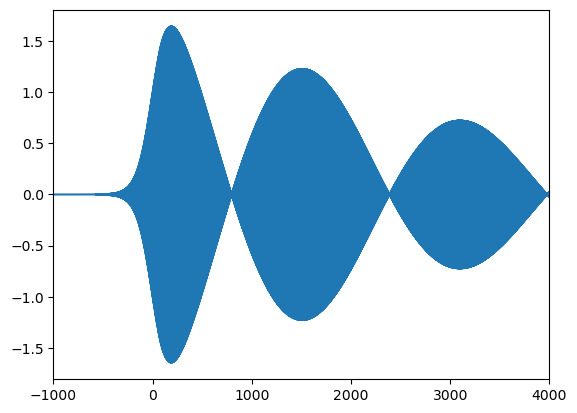

In [12]:
x = np.linspace(-1000,100000,int(5e6))
risetime = 80
frequency1 = 1.5129/6.582e-1
frequency2 = 1.5103/6.582e-1
T2 = 3000

y1 = s.expit(x/risetime)*np.sin(x*frequency1)*((x<risetime)+(x>risetime)*np.exp(-(x-risetime)/T2))
y2 = s.expit(x/risetime)*np.sin(x*frequency2)*((x<risetime)+(x>risetime)*np.exp(-(x-risetime)/T2))
plt.plot(x,y1+y2)
plt.xlim(-1000,4000)

c:\Users\mattl\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-1000.0, 4000.0)

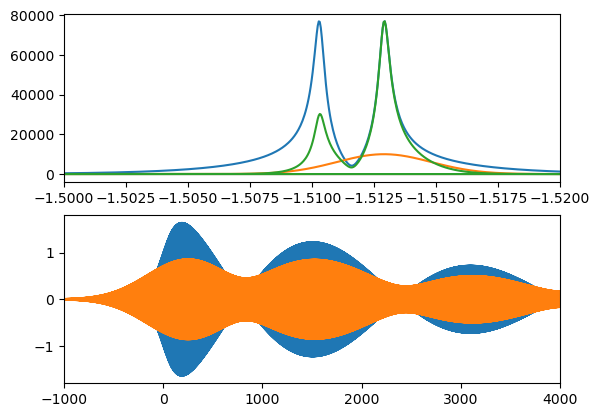

In [22]:
E = np.fft.fftfreq(len(x),x[0]-x[1])*6.582e-1*np.pi*2
a = np.fft.fft(y1+y2)
E1 = frequency1*6.582e-1
DE = 1.9e-3
filt = np.exp(-(E-E1)**2/(2*DE**2))+np.exp(-(E+E1)**2/(2*DE**2)) 
sigfilt = a*filt
signal = np.fft.ifft(sigfilt)
zfilt = np.exp(-(E)**2/(2*DE**2)) 
fig,ax = plt.subplots(2)
ax[0].plot(E,np.abs(a),label='rawsignal')
ax[0].plot(E,1e4*filt,label='filter at frequency 1 ')
ax[0].plot(E,np.abs(sigfilt),label='filtered signal at frequency 1')

#ax[0].plot(E,np.abs(np.convolve(np.abs(a),zfilt/np.sum(zfilt),mode='same')),label='post spectrometer signal')
ax[0].set_xlim(-1.50,-1.52)
#ax[0].legend()

ax[1].plot(x,y1+y2,label='rawsignal')
ax[1].plot(x,signal,label='filtered signal')
ax[1].set_xlim(-1000,4000)


In [35]:
.6627-.6649

-0.0022000000000000908